In [1]:
import pandas as pd

In [2]:
filename = "C:/Users/CMU Lab/Downloads/crime_data_full.csv"
df = pd.read_csv(filename)

<Axes: ylabel='primary_type'>

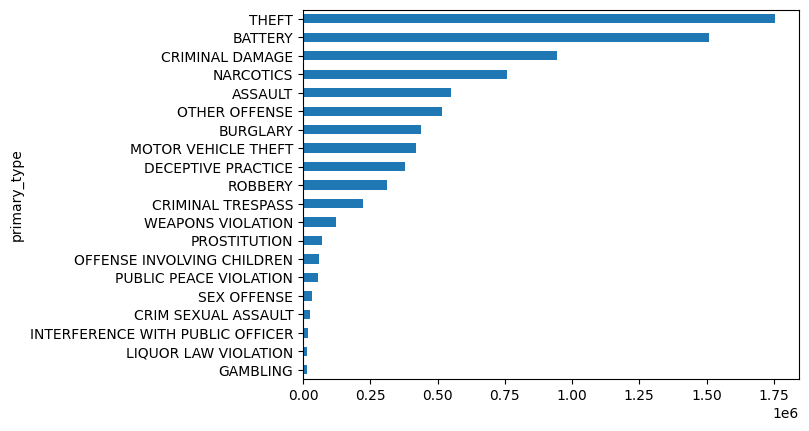

In [3]:
df.groupby("primary_type").size().sort_values().tail(20).plot.barh()

<Axes: ylabel='location_description'>

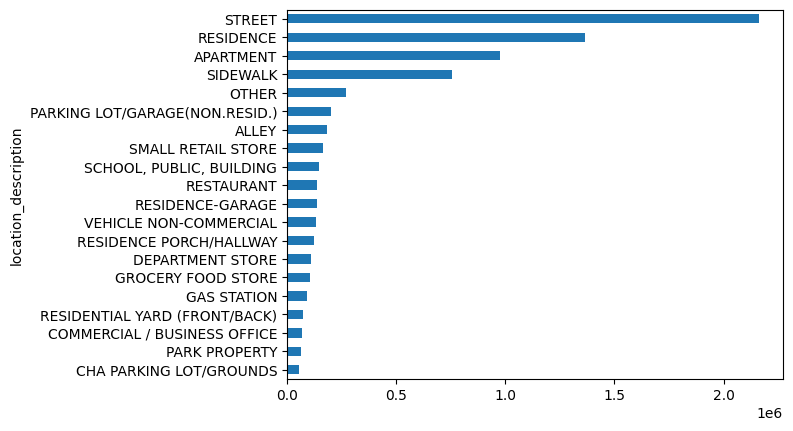

In [4]:
df.groupby("location_description").size().sort_values().tail(20).plot.barh()

<Axes: xlabel='year,month'>

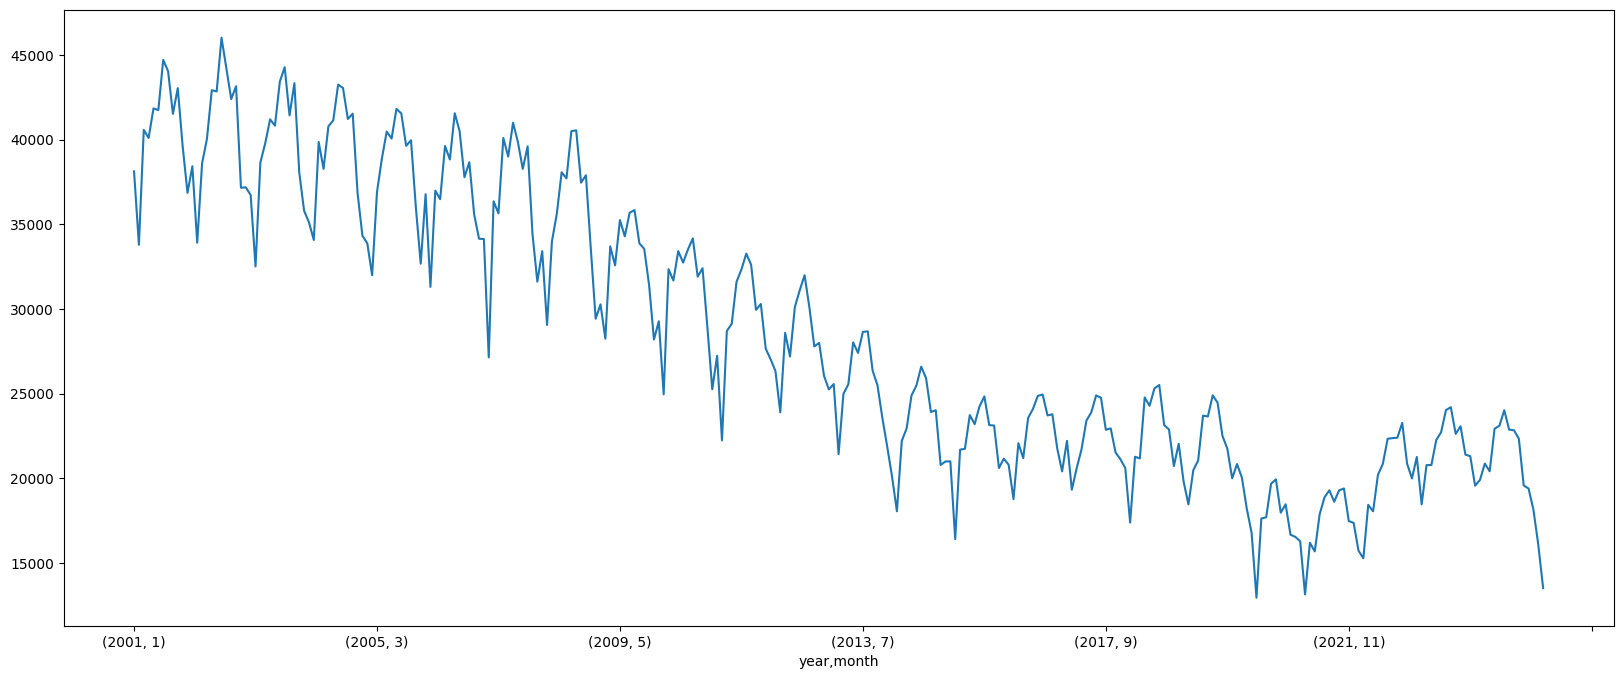

In [5]:
df['date'] =  pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.groupby(['year', 'month']).size().plot(figsize=(20, 8))

In [23]:
df[df['year'] == 2025]

id case_number       date                                block  \
0      13784475    JJ192352 2025-03-23                      001XX E 71ST ST   
1      13784926    JJ192921 2025-03-23                  054XX N WESTERN AVE   
2      13784424    JJ191943 2025-03-23                    001XX N MORGAN ST   
3      13786236    JJ194773 2025-03-23  061XX S DR MARTIN LUTHER KING JR DR   
4      13784274    JJ192197 2025-03-23                  020XX N WOLCOTT AVE   
...         ...         ...        ...                                  ...   
47727  13708117    JJ100354 2025-01-01                   020XX N KARLOV AVE   
47728  13719406    JJ113691 2025-01-01            070XX S COTTAGE GROVE AVE   
47729  13708601    JJ100848 2025-01-01                   044XX S PULASKI RD   
47730  13708335    JJ100473 2025-01-01                   040XX W CRYSTAL ST   
47731  13708558    JJ100812 2025-01-01                  001XX S CENTRAL AVE   

       iucr         primary_type                          description  \
0      2028            NARCOTICS            POSSESS - SYNTHETIC DRUGS   
1      0910  MOTOR VEHICLE THEFT                           AUTOMOBILE   
2      0810                THEFT                            OVER $500   
3      0760             BURGLARY          BURGLARY FROM MOTOR VEHICLE   
4      1153   DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
...     ...                  ...                                  ...   
47727  1310      CRIMINAL DAMAGE                          TO PROPERTY   
47728  2825        OTHER OFFENSE              HARASSMENT BY TELEPHONE   
47729  0860                THEFT                         RETAIL THEFT   
47730  1310      CRIMINAL DAMAGE                          TO PROPERTY   
47731  0810                THEFT                            OVER $500   

      location_description  arrest  domestic  ...  community_area  fbi_code  \
0                   STREET    True     False  ...            69.0        18   
1                   STREET   False     False  ...             4.0        07   
2            BAR OR TAVERN   False     False  ...            28.0        06   
3                   STREET   False     False  ...            40.0        06   
4                APARTMENT   False     False  ...            22.0        11   
...                    ...     ...       ...  ...             ...       ...   
47727            APARTMENT   False     False  ...            20.0        14   
47728      OTHER (SPECIFY)   False     False  ...            42.0        26   
47729   SMALL RETAIL STORE    True     False  ...            57.0        06   
47730            RESIDENCE   False     False  ...            23.0        14   
47731             SIDEWALK   False     False  ...            25.0        06   

       x_coordinate  y_coordinate  year               updated_on   latitude  \
0         1178638.0     1857980.0  2025  2025-03-30T15:41:18.000  41.765598   
1         1159358.0     1935956.0  2025  2025-03-30T15:41:18.000  41.979989   
2         1169744.0     1901459.0  2025  2025-03-30T15:41:18.000  41.885107   
3         1179972.0     1864490.0  2025  2025-03-30T15:41:18.000  41.783432   
4         1163368.0     1913537.0  2025  2025-03-30T15:41:18.000  41.918386   
...             ...           ...   ...                      ...        ...   
47727     1148722.0     1913208.0  2025  2025-01-08T15:42:09.000  41.917779   
47728     1182773.0     1858454.0  2025  2025-01-15T15:44:07.000  41.766804   
47729     1150424.0     1874895.0  2025  2025-01-08T15:42:09.000  41.812611   
47730     1149194.0     1908031.0  2025  2025-01-08T15:42:09.000  41.903564   
47731     1139077.0     1898867.0  2025  2025-01-08T15:42:09.000  41.878607   

       longitude                              location  month  
0     -87.620790  \n,  \n(41.765598334, -87.620790351)      3  
1     -87.689314   \n,  \n(41.979988518, -87.68931361)      3  
2     -87.652126   \n,  \n(41.885106529, -87.65212608)      3  
3     -87.615702  \n,  \n(41.7834

In [34]:
df_2025 = df[df['year'] == 2025][['longitude', 'latitude']].head(500).dropna()

In [37]:
import altair as alt

map = alt.Chart(df_2025).mark_circle().encode(
    longitude = "longitude",
    latitude = "latitude",
    size = "count()"
).project(
    type = "mercator"
)

map

alt.Chart(...)